Import những thư viện cần thiết

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import matplotlib.image as mpimg
from matplotlib.patches import Rectangle
from matplotlib.collections import PatchCollection

import seaborn as sns

%matplotlib inline

Cài đặt kích thước figure mặt định cho toàn bộ notebook

In [2]:
plt.rcParams["figure.figsize"] = [12, 8]

custom = {"axes.edgecolor": "blue", "grid.linestyle": "dashed", "grid.color": "black"}
sns.set_style("whitegrid", rc = custom)

# Biểu đồ đường (Line plot)

Chuẩn bị dữ liệu

In [3]:
x = np.linspace(0, 2*np.pi, 50)
y = np.sin(x)

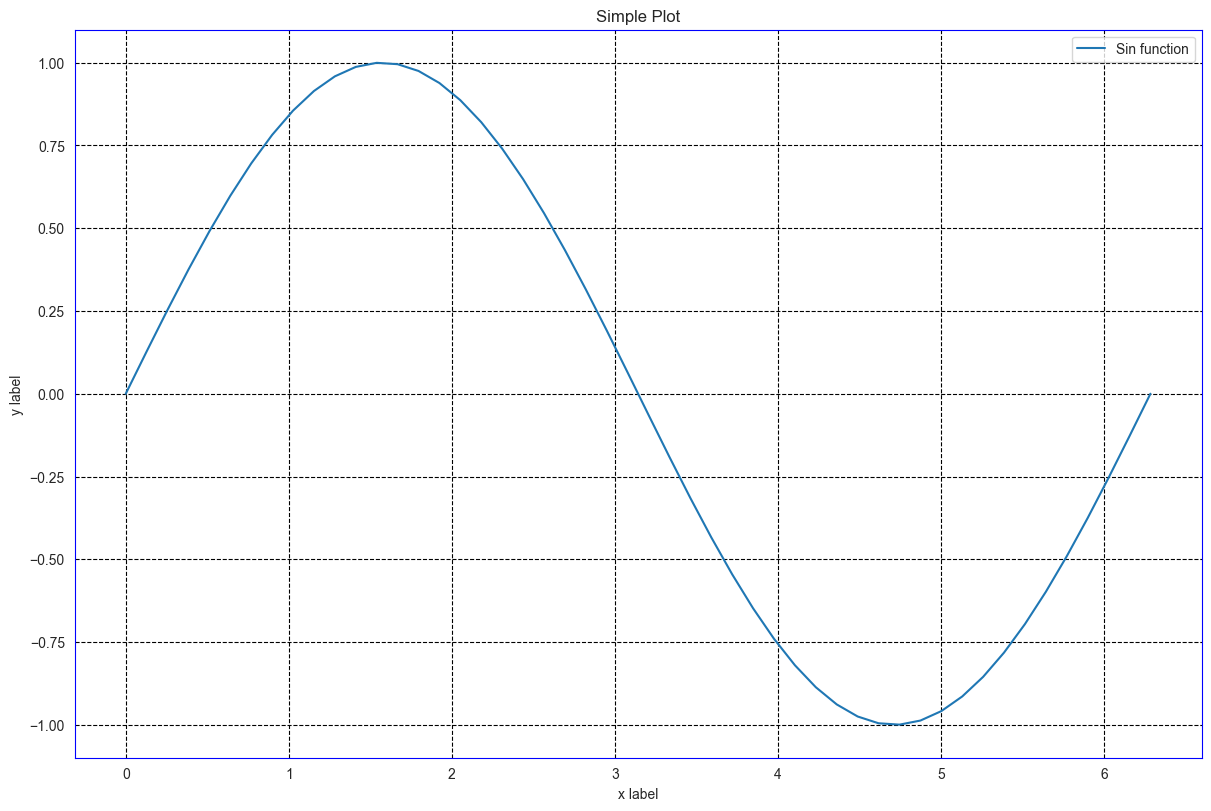

In [4]:
fig, ax = plt.subplots(layout='constrained')
line,  = ax.plot(x, y, '-')
# ax.plot(x, y, 'b*')
# line.set_linestyle(':')

# ----------------------
#ax.plot(x, y, 'red') # Change color
# ----------------------
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
# ax.legend(['Sin function']) # Add a legend
plt.legend(['Sin function', 'Data Points']) 

Xấp xỉ hàm sin bằng hàm bậc 3

$$
f(x) = ax^3 + bx^2 + cx + d
$$

Hàm $f(x)$ được biểu diễn dưới dạng tổng của các hàm toán cơ bản:
- $ax^3$
- $bx^2$
- $cx$
- $d$

In [5]:
X = np.array([np.power(x, 3), np.power(x, 2), x, np.ones_like(x)]).T
X.shape

(50, 4)

In [6]:
kappa = 1e-08
theta_ml = np.linalg.pinv(X.T @ X + kappa*np.eye(X.shape[1])) @ X.T @ y
theta_ml

array([ 0.09120167, -0.8595555 ,  1.85274437, -0.1649196 ])

In [7]:
y_pred = X @ theta_ml

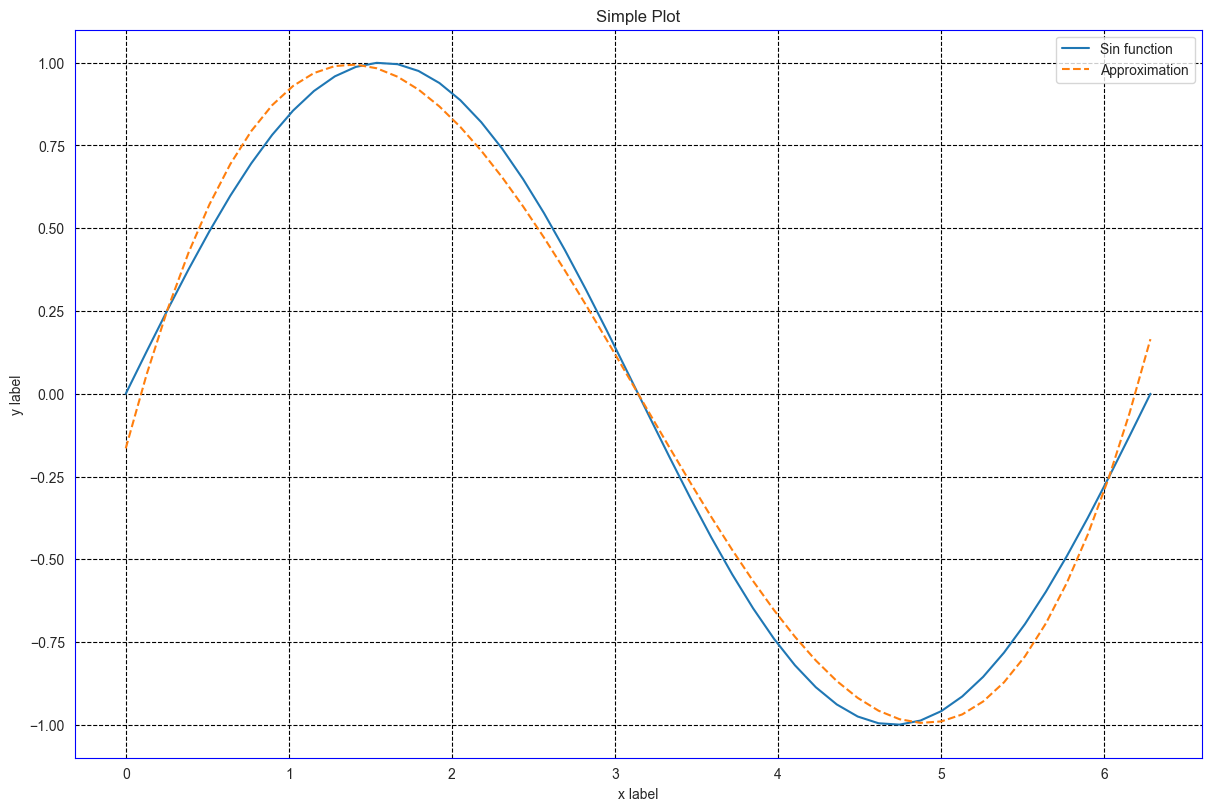

In [8]:
fig, ax = plt.subplots(layout='constrained')
line,  = ax.plot(x, y, '-')
fitting, = ax.plot(x, y_pred, '--')
# line.set_linestyle(':')

# ----------------------
#ax.plot(x, y, 'red') # Change color
# ----------------------
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
# ax.legend(['Sin function']) # Add a legend
plt.legend(['Sin function', 'Approximation']) 

## Biểu đồ phân tán (Scatter plot)

In [10]:
ages = pd.read_csv('data/ages.csv')
ages.shape

(170, 2)

In [ ]:
ages.head()

,Wife,Husband
0,43,49
1,28,25
2,30,40
3,57,52
4,52,58


Text(0.5, 1.0, 'Age at marriage')

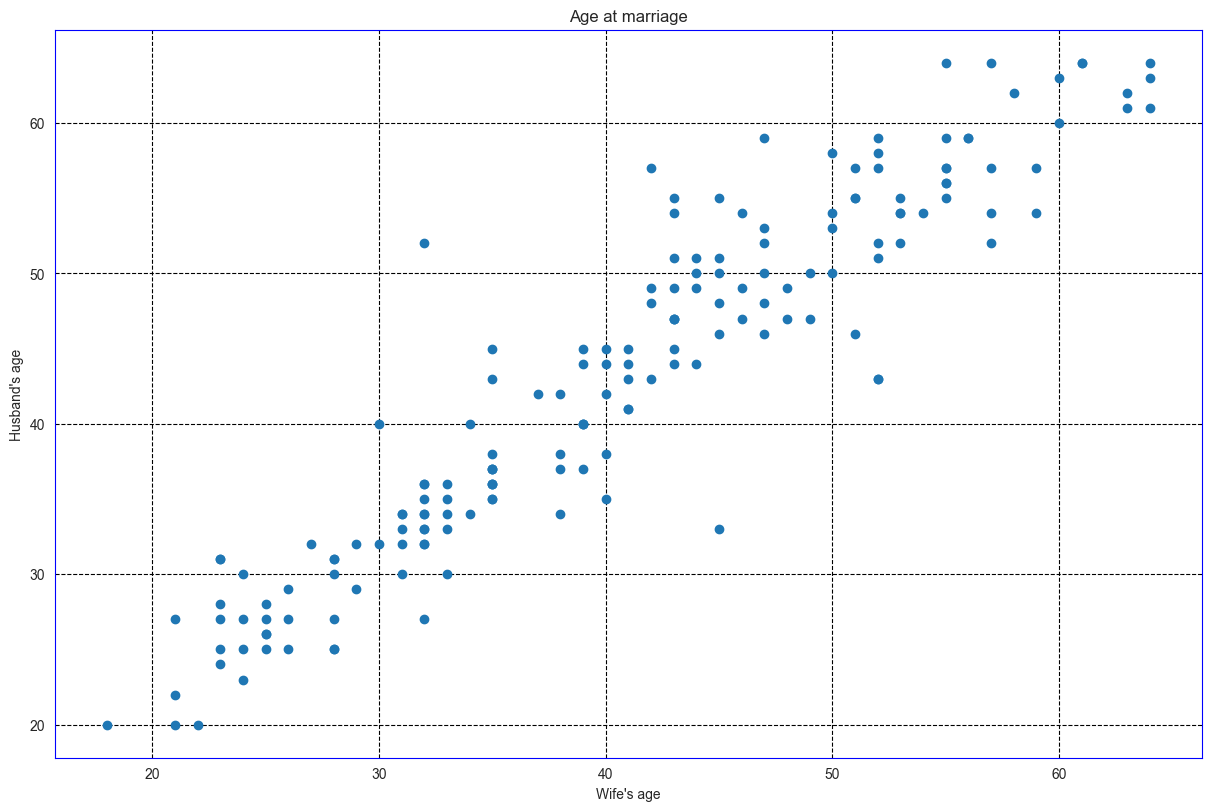

In [11]:
fig, ax = plt.subplots(layout='constrained')

ax.scatter(ages['Wife'], ages['Husband'])

ax.set_xlabel("Wife's age")
ax.set_ylabel("Husband's age")
ax.set_title('Age at marriage')
# plt.savefig('data/ages.png', dpi=300)

Ta nhận thấy mối quan hệ giữa tuổi vợ và tuổi chồng là tuyến tính với nhau? Thử dùng hồi quy tuyến tính?

In [12]:
X = np.array([np.ones_like(ages.Wife), ages.Wife]).T 
theta_age = np.linalg.pinv(X) @ ages.Husband
theta_age

array([3.59013936, 0.96669698])

In [13]:
fit_x = np.arange(20, 65)
fit_y = theta_age[0] + theta_age[1]*fit_x

Text(0.5, 1.0, 'Age at marriage')

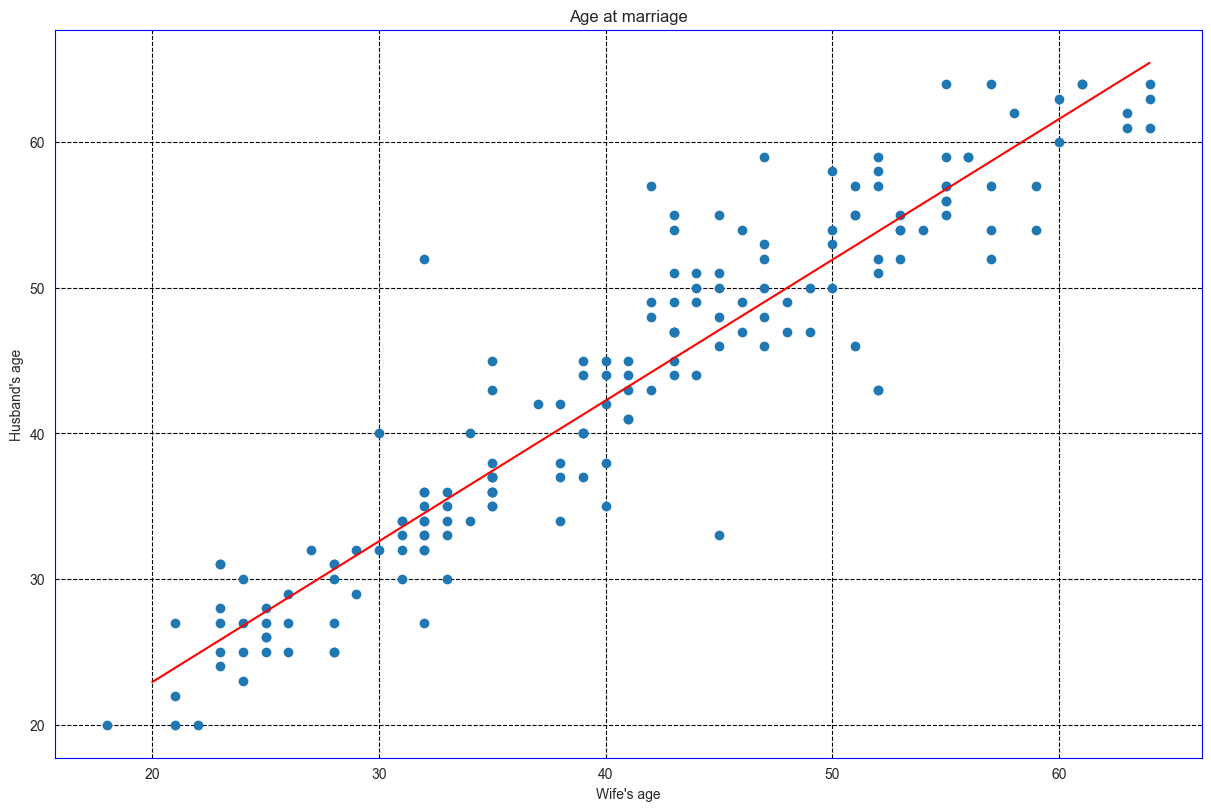

In [14]:
fig, ax = plt.subplots(layout='constrained')

ax.scatter(ages['Wife'], ages['Husband'])

ax.plot(fit_x, fit_y, 'red')

ax.set_xlabel("Wife's age")
ax.set_ylabel("Husband's age")
ax.set_title('Age at marriage')
# plt.savefig('data/ages.png', dpi=300)

# Biều đồ cột (bar chat) và Biểu đồ đường (pie chart)

In [15]:
dataA = [17, 18, 20, 22, 23]
dataB = [20, 20, 19, 21, 20]
dataC = [23, 22, 20, 18, 17]

In [16]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
print(colors)

['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']


(0.0, 25.0)

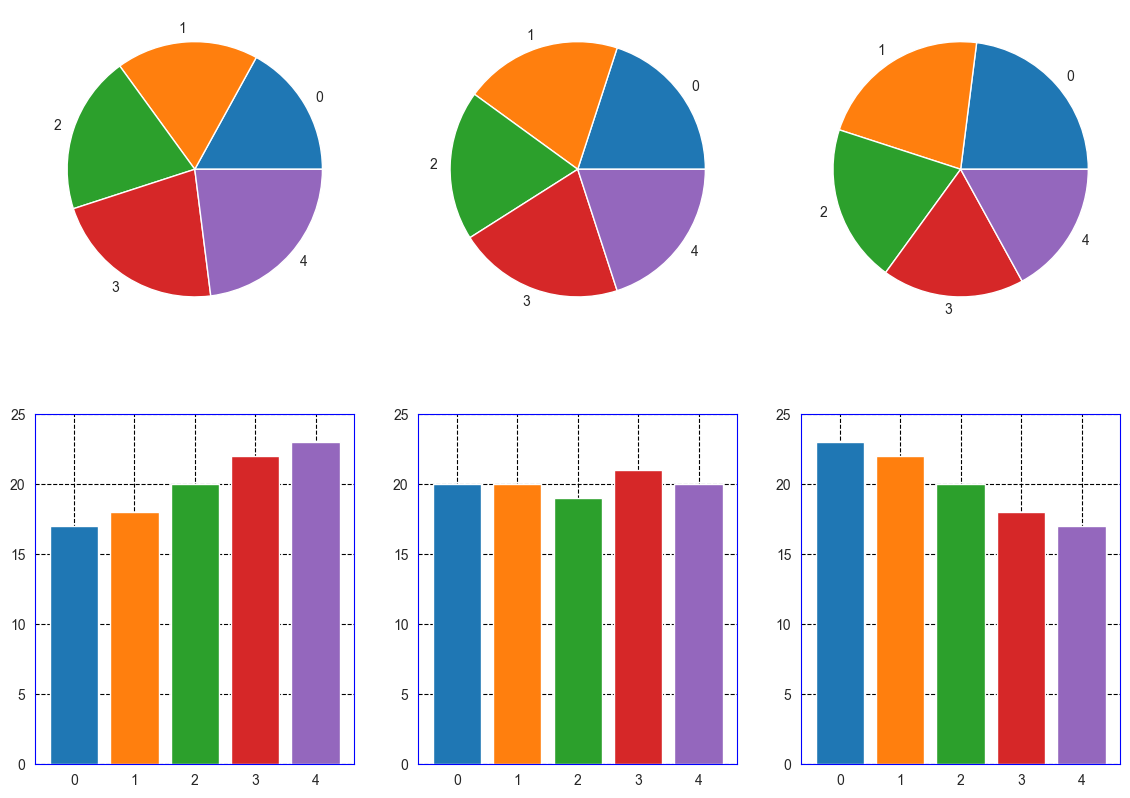

In [17]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=False)
fig.set_size_inches(14, 10)

axs[0][0].pie(dataA, labels=range(5))
axs[0][1].pie(dataB, labels=range(5))
axs[0][2].pie(dataC, labels=range(5))

axs[1][0].bar(x=range(5), height=dataA, color=colors)
axs[1][0].set_ylim(0, 25)

axs[1][1].bar(x=range(5), height=dataB, color=colors)
axs[1][1].set_ylim(0, 25)

axs[1][2].bar(x=range(5), height=dataC, color=colors)
axs[1][2].set_ylim(0, 25)

# Patches

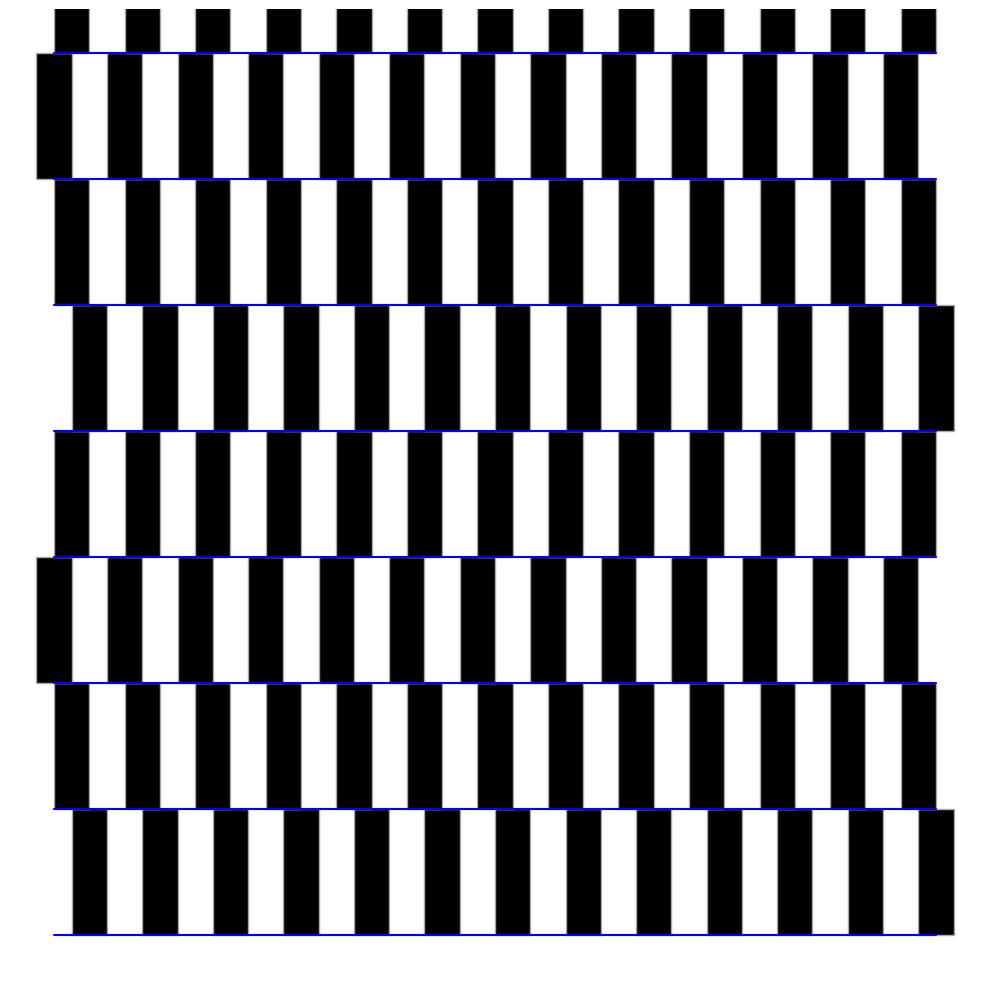

In [18]:
fig, ax = plt.subplots(1, figsize=(10, 10))
#ax = plt.gca()

squares = []

for i in range(8):
    ax.plot([0, 25], [i, i], 'blue')
    
    for j in range(0, 26, 2):
        sq = Rectangle((j+0.5*np.sin((i+1)*np.pi/2), i), 1, 1, fill=True)
        squares.append(sq)

pc = PatchCollection(squares, facecolor='black', edgecolor='darkgrey')
ax.add_collection(pc)
ax.axis('off')
fig.tight_layout()

# Biểu đồ bong bóng (Bubble plot)

In [20]:
data = pd.read_csv('data/gapminder.csv')

In [21]:
data.head()

,Country,GDP,Population,LifeExpectancy,Continent
0,Algeria,6223.367465,33333216,72.301,0
1,Angola,4797.231267,12420476,42.731,0
2,Benin,1441.284873,8078314,56.728,0
3,Botswana,12569.851770,1639131,50.728,0
4,Burkina Faso,1217.032994,14326203,52.295,0


In [22]:
colors = np.array([
    '#5A6FFA',
    '#E60DA1',
    "#7E7E7E",
    "#B7F025",
    "#FF9A1E"])

continents = [
    'Africa',
    'Americas',
    'Asia',
    'Europe',
    'Oceania']

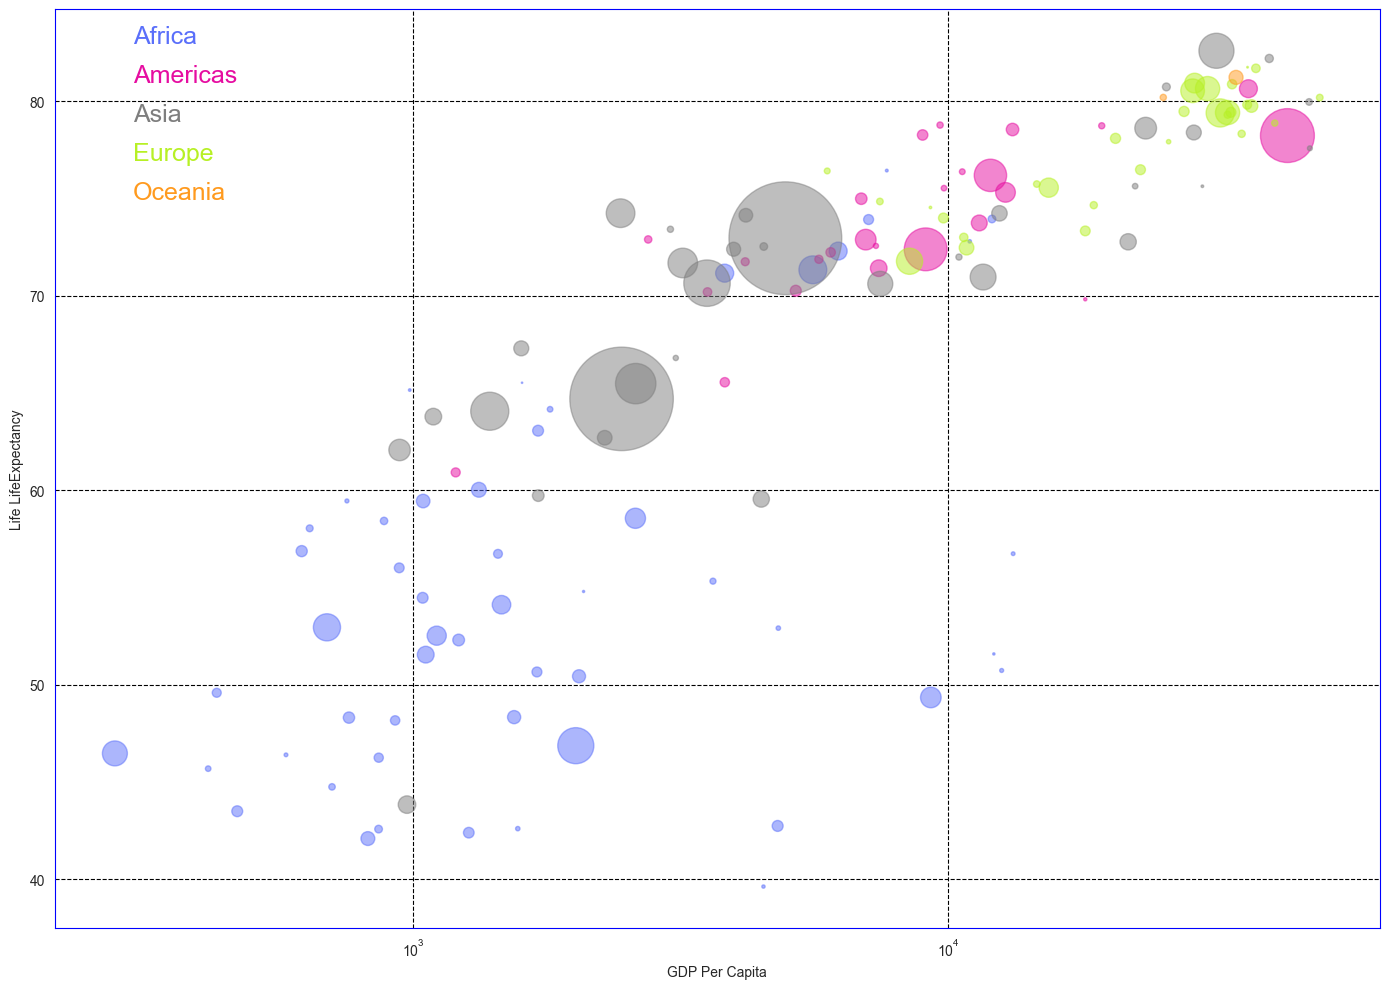

In [23]:
fig = plt.figure()
ax = plt.gca()

fig.set_size_inches(14, 10)

for i in range(5):
    continent = data[data['Continent']==i]
    
    ax.scatter(continent['GDP'], # x-axis
               continent['LifeExpectancy'], # y-axis
               s=continent['Population']/200000, # Bubble size
               c=colors[i], # Bubble color
               alpha=0.5) # Transparency

ax.set_xscale('log')

# Add the legend manually
for i in range(len(continents)):
    ax.text(300, 83-i*2, continents[i], color=colors[i], fontsize=18)

ax.set_xlabel('GDP Per Capita')
ax.set_ylabel('Life LifeExpectancy')

fig.tight_layout()

# Tháp tuổi (Age pyramid)

In [25]:
pyramid = pd.read_csv('data/pyramid.csv')

In [26]:
pyramid.head()

,Age,Female,Male,Male_Inverse,OBJECTID
0,0 - 10,113083,114153,-114153,0
1,10 - 20,88861,80755,-80755,1
2,20 - 30,130033,120694,-120694,2
3,30 - 40,66020,92146,-92146,3
4,40 - 50,28289,45107,-45107,4


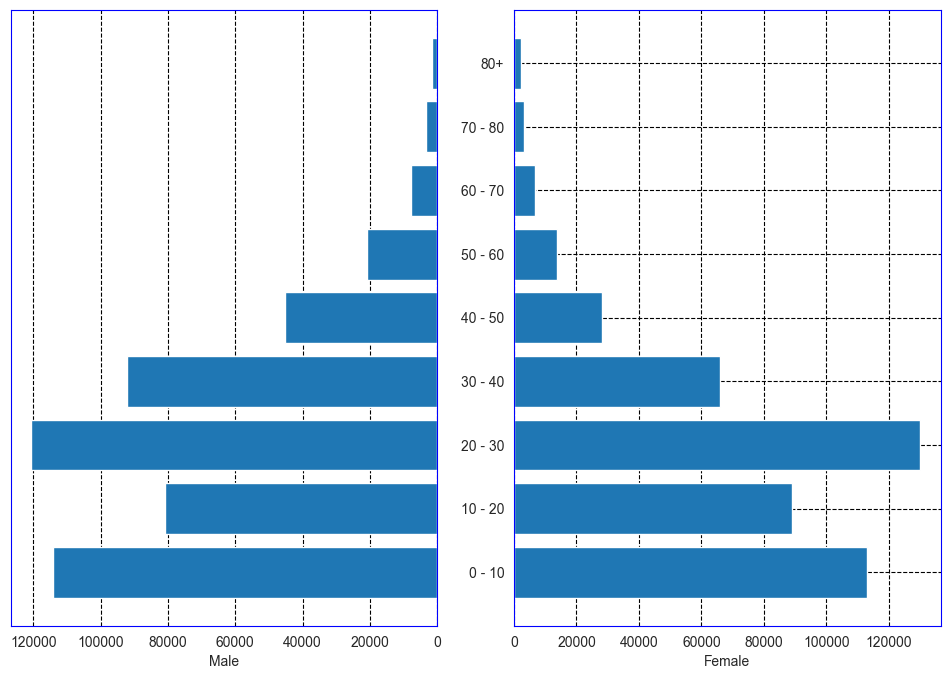

In [27]:
fig, axs = plt.subplots(1, 2, sharey=False, sharex=False)
axs[0].barh(range(9), pyramid['Male'])
axs[1].barh(range(9), pyramid['Female'])

axs[0].invert_xaxis()
axs[0].set_yticks([])
axs[0].set_yticklabels('')

axs[1].set_yticks(range(9))
axs[1].set_yticklabels(pyramid['Age'])

axs[0].set_xlabel('Male')
axs[1].set_xlabel('Female')

fig.subplots_adjust(wspace=0.18)

# Biểu đồ các ngọn nến (Candle stick plots)

In [29]:
djia = pd.read_csv('data/DJIA.csv')

In [30]:
djia = djia.iloc[-20:]

In [31]:
djia.shape

(20, 7)

Ta trực quan opens, closes, highs, lows cùng một biểu đồ, do đó ta lấy chúng ra

In [32]:
opens = djia['Open'].values
closes = djia['Close'].values
highs = djia['High'].values
lows = djia['Low'].values

Tính toán độ chênh lệch

In [33]:
changes = closes-opens

Biến độ lên có nghĩa là biến changes lớn hơn 0, ngược lại là đi xuống

In [34]:
ups = changes > 0
downs = ~ups

Phát sinh tự động vị trí cho các cột trong biểu đồ

In [35]:
pos = np.arange(djia.shape[0])

In [36]:
x = np.vstack([pos, pos])
y = np.vstack([highs, lows])

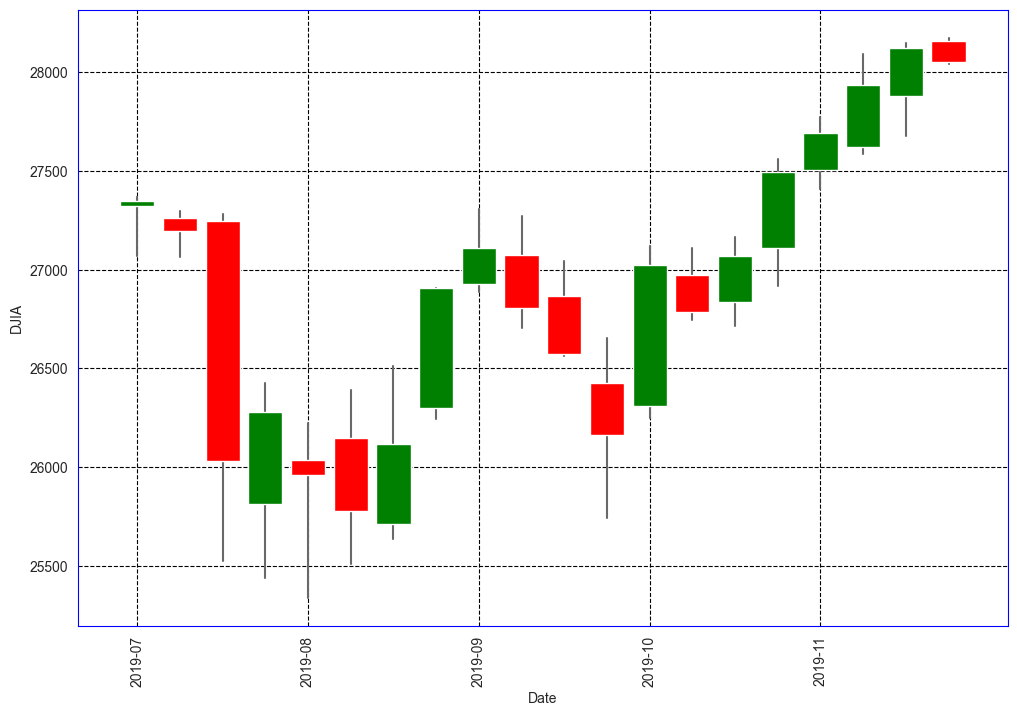

In [37]:
fig, ax = plt.subplots(1)

ax.bar(x=pos[ups],   height=changes[ups],    bottom=opens[ups],    color='g', zorder=2)
ax.bar(x=pos[downs], height=-changes[downs], bottom=closes[downs], color='r', zorder=2)
ax.plot(x, y, color='dimgray', zorder=1)

ax.set_xticks(pos[::4])
ax.set_xticklabels([date[:7] for date in djia['Date'].values[::4]], rotation=90)
ax.set_xlabel('Date')
ax.set_ylabel('DJIA');